<h1>Preprocessing NLP Data</h1><br>
-lowering the format <br>
-tokenization<br>
-removing stop words<br>
-stemming/lemmatization<br>
-spell correction<br>
-spell correction <br>

In [3]:
!pip install autocorrect

  Stored in directory: C:\Users\Rakshita Pawar\AppData\Local\pip\Cache\wheels\1f\71\da\4a15028d25fbd5fb97fb76c5f76f0ad86f0caa69394dd7cfa7
Successfully built autocorrect


In [11]:
!pip install wordcloud

In [1]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\Rakshita
[nltk_data]     Pawar\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [54]:
from nltk.tokenize import word_tokenize 
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
stemmer=PorterStemmer()
from wordcloud import WordCloud
import pandas as pd
import matplotlib.pyplot as plt
from autocorrect import Speller
spell=Speller()
from tqdm import tqdm
import re
import pickle

In [3]:
data=pd.read_csv('spam.csv')

In [4]:
data

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
5,spam,FreeMsg Hey there darling it's been 3 week's n...,NaN,NaN,NaN
6,ham,Even my brother is not like to speak with me. ...,NaN,NaN,NaN
7,ham,As per your request 'Melle Melle (Oru Minnamin...,NaN,NaN,NaN
8,spam,WINNER!! As a valued network customer you have...,NaN,NaN,NaN
9,spam,Had your mobile 11 months or more? U R entitle...,NaN,NaN,NaN


In [7]:
data.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1,inplace=True)
data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
data.rename(columns={'v1':'label','v2':'messages'},inplace=True)
data

,label,messages,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
5,spam,FreeMsg Hey there darling it's been 3 week's n...,NaN,NaN,NaN
6,ham,Even my brother is not like to speak with me. ...,NaN,NaN,NaN
7,ham,As per your request 'Melle Melle (Oru Minnamin...,NaN,NaN,NaN
8,spam,WINNER!! As a valued network customer you have...,NaN,NaN,NaN
9,spam,Had your mobile 11 months or more? U R entitle...,NaN,NaN,NaN


<b>Lets visualize the spam  words

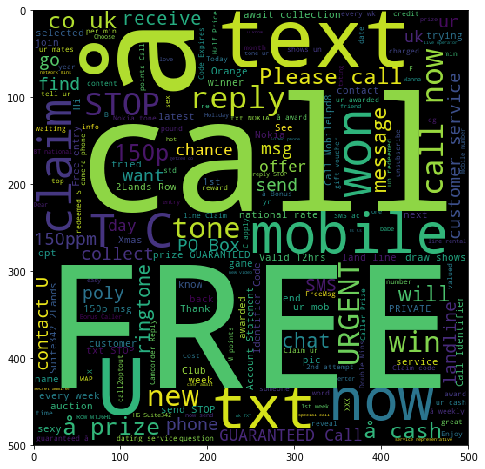

In [7]:
spam_words = ' '.join(list(data[data['label']=='spam']['messages']))
spam_wc=WordCloud(width=500,height=500).generate(spam_words)
plt.figure(figsize=(10,8))
plt.imshow(spam_wc)
plt.show()


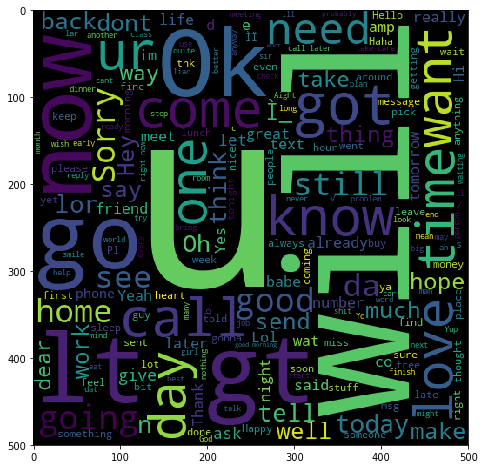

In [8]:
spam_words = ' '.join(list(data[data['label']=='ham']['messages']))
spam_wc=WordCloud(width=500,height=500).generate(spam_words)
plt.figure(figsize=(10,8))
plt.imshow(spam_wc)
plt.show()


<b><h1>Preprocessing data<h1>

In [9]:
data.shape

(5572, 5)

In [25]:
#encoding our labels
data['label']=data['label'].apply(lambda x:1 if x=='spam' else 0)


In [22]:
new_data=[]
for i in tqdm(range(data.shape[0])):#applying on rows
    lines=data.iloc[i,1]#messages column
    #removing an non alphabetic character
    lines=re.sub('[^A-Za-z]',' ',lines)
    #lowering every word
    lines=lines.lower()
    #tokenization
    tokenize_lines=word_tokenize(lines)
    #removing stopwords and stemming
    preprocessed_lines=[]
    #removing stop words  and stemming
    for i in tokenize_lines:
        if i not in (stopwords.words('english')):
            preprocessed_lines.append(spell(stemmer.stem(i)))
    final_lines=' '.join(preprocessed_lines)
    new_data.append(final_lines)
            


100%|█████████████████████████████████████████| 5572/5572 [05:28<00:00, 16.97it/s]


In [28]:
new_data

['go during point crazy avail bugs n great world la e buffet cine got amor wat',
 'ok lar joke if u oni',
 'free entry wki comp win fa cup final tt st may text fa receive entry question std txt rate c apply',
 'u dun say early hor u c already say',
 'nah think go usf live around though',
 'frees hey dark week word back like fun still tb ok xxx std chg send rev',
 'even brother like speak treat like aid patent',
 'per request well well oru minnaminungint nurungu vietnam set callertun caller press copy friend callertun',
 'winner value network custom select received prize reward claim call claim code kl valid hour',
 'mobil month u r entity update latest colour mobil camera free call mobil update co free',
 'gon na home soon want talk stuff anymore tonight k cri enough today',
 'six chance win cash pound txt cs send cost p day day stand apply reply hl info',
 'urgent week free membership prize jackpot txt word claim c www duk net lccltd box link rw',
 'search right word thank breathe pro

In [16]:
lines

'rofl  its true to its name'

In [18]:
tokenize_lines

['rofl', 'its', 'true', 'to', 'its', 'name']

In [20]:
preprocessed_lines

['rofl', 'true', 'name']

In [29]:
y=data['label']
y

0       0
1       0
2       1
3       0
4       0
5       1
6       0
7       0
8       1
9       1
10      0
11      1
12      1
13      0
14      0
15      1
16      0
17      0
18      0
19      1
20      0
21      0
22      0
23      0
24      0
25      0
26      0
27      0
28      0
29      0
       ..
5542    0
5543    0
5544    0
5545    0
5546    0
5547    1
5548    0
5549    0
5550    0
5551    0
5552    0
5553    0
5554    0
5555    0
5556    0
5557    0
5558    0
5559    0
5560    0
5561    0
5562    0
5563    0
5564    0
5565    0
5566    1
5567    1
5568    0
5569    0
5570    0
5571    0
Name: label, Length: 5572, dtype: int64

<h1>Splitting the data into training and Testing

In [31]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(new_data,y,test_size=0.25)

In [32]:
len(x_train)

4179

<h1>Vectorization

In [34]:
from sklearn.feature_extraction.text import CountVectorizer #tf-idf
matrix=CountVectorizer()

In [35]:
x_train_vec=matrix.fit_transform(x_train).toarray()
x_test_vec=matrix.transform(x_test).toarray()

In [37]:
x_train_vec

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

<h1>

<h1>Model Training

In [40]:
from sklearn.naive_bayes import GaussianNB
model=GaussianNB()


In [42]:
model.fit(x_train_vec,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [48]:
y_pred = model.predict(x_test_vec)

In [49]:
y_test

4790    0
2375    0
2376    0
4894    1
1774    0
2321    0
1175    0
2077    0
2373    1
4867    0
5101    0
4611    0
4752    1
2165    0
1141    1
1517    1
757     0
2928    0
2592    0
3761    1
2195    0
4362    0
557     0
4868    0
391     0
972     0
5062    0
1377    1
983     0
4371    1
       ..
2720    0
1247    0
3048    0
4139    0
1555    0
781     0
502     0
300     0
4010    1
3316    0
869     1
2264    0
2603    0
4029    0
4260    0
4726    1
3126    0
4980    0
4833    0
297     0
786     0
4877    1
4033    0
1655    0
202     0
2356    0
1447    0
5346    0
3864    0
3585    1
Name: label, Length: 1393, dtype: int64

In [50]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [52]:
accuracy_score(y_test,y_pred)*100

84.99641062455133

In [53]:
confusion_matrix(y_test,y_pred)

array([[1037,  178],
       [  31,  147]], dtype=int64)

In [58]:
pickle.dump(matrix,open('transform.pkl','wb'))
filename='nlp_model.pkl'
clf=pickle.dump(model,open(filename,'wb'))


SyntaxError: invalid syntax (<ipython-input-56-a35077a93b18>, line 1)